In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/time_series.csv')

## Reading Data

In [6]:
df

,people
0,176
1,351
2,101
3,386
4,199
...,...
351,597
352,291
353,198
354,439


## stats for using in arima model

In [9]:
def test_stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(df)

Results of Dickey-Fuller Test:
Test Statistic                -1.426305e+01
p-value                        1.415804e-26
#Lags Used                     1.000000e+00
Number of Observations Used    3.540000e+02
Critical Value (1%)           -3.448958e+00
Critical Value (5%)           -2.869739e+00
Critical Value (10%)          -2.571138e+00
dtype: float64


## plotting graph

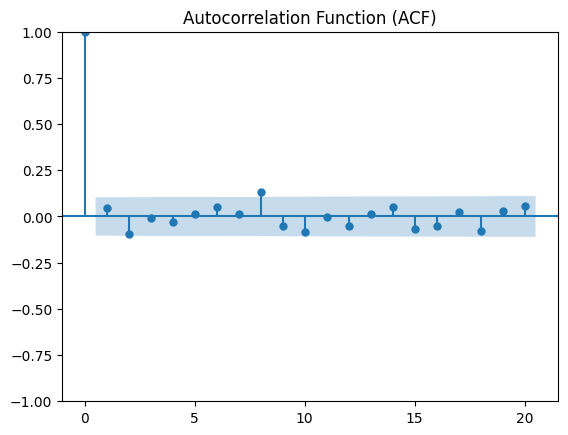

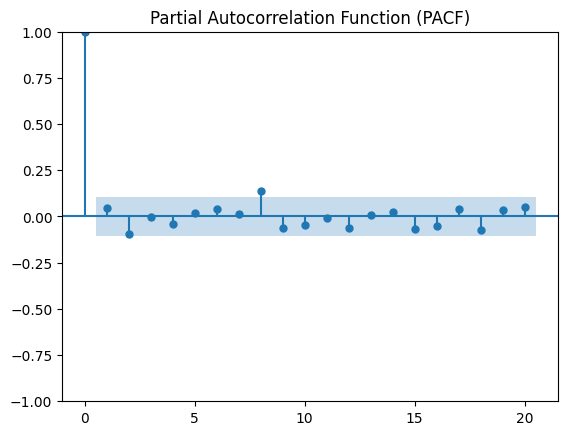

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## Results 

                               SARIMAX Results                                
Dep. Variable:                 people   No. Observations:                  356
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2285.567
Date:                Sun, 28 Apr 2024   AIC                           4577.135
Time:                        02:22:03   BIC                           4588.759
Sample:                             0   HQIC                          4581.759
                                - 356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        344.4972      8.274     41.634      0.000     328.280     360.715
ar.L1          0.0468      0.052      0.896      0.370      -0.056       0.149
sigma2      2.206e+04   2702.111      8.165      0.0

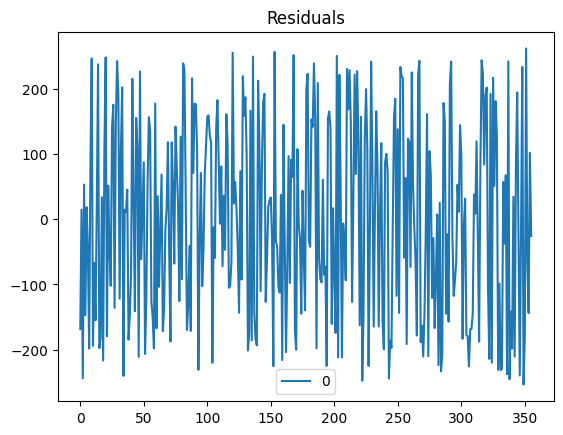

In [19]:
from statsmodels.tsa.arima.model import ARIMA
p = 1.415804
d = 0.142
q = 0.12
p = int(round(p))
d = int(round(d))
q = int(round(q))

model = ARIMA(df, order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals')
plt.show()


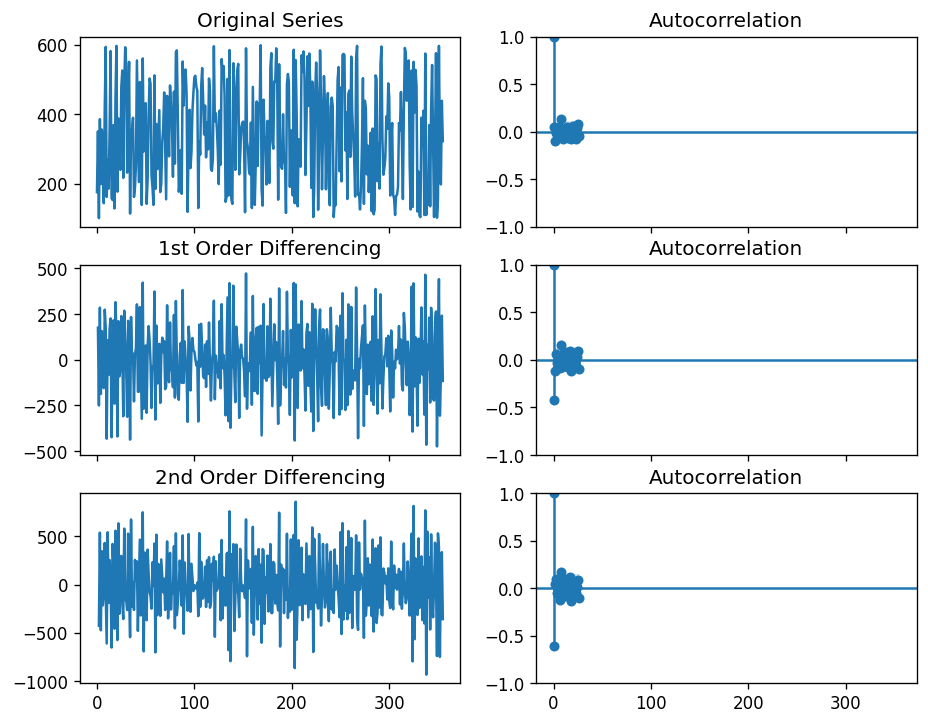

In [23]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.people); axes[0, 0].set_title('Original Series')
plot_acf(df.people, ax=axes[0, 1])

axes[1, 0].plot(df.people.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.people.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df.people.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.people.diff().diff().dropna(), ax=axes[2, 1])

plt.show()